# Overview 
This notebook uses the final results and the results from Wes Gohn's publication to compare kaon to pion BSAs.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

%matplotlib inline

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=18)

In [3]:
kaon_df = pd.read_csv('../results/fit/sys.csv')
pion_df = pd.read_csv('../results/wes/pip.csv')

In [4]:
kaon_df.head() 

,axis,axis_bin,axis_max,axis_min,bootstraps_0,bootstraps_1,bootstraps_2,err_0,err_1,err_2,...,sys_9_par2,sys_10_par0,sys_10_par1,sys_10_par2,sys_5_par0,sys_5_par1,sys_5_par2,sys_12_par0,sys_12_par1,sys_12_par2
0,pt,0,0.202108,0.000284,[0.02112577 0.01516629 0.02222966 0.02541861 0...,[-5.66185191e-02 8.10683131e-01 -6.24376833e-...,[-0.70087063 -1. -1. -0.126798...,0.004949,0.402440,0.502509,...,0.012242,0.000197,0.032125,0.121967,0.000980,0.025291,0.014123,0.000148,0.147064,0.047774
1,pt,1,0.274544,0.202108,[0.02149411 0.02956919 0.02537624 0.03226038 0...,[-0.45187283 -0.69847596 -0.43178326 -0.712035...,[ 4.26855534e-01 1.58746868e-01 3.03538024e-...,0.006787,0.419746,0.514578,...,0.016299,0.002450,0.085908,0.217781,0.001356,0.065123,0.104378,0.000260,0.014758,0.057581
2,pt,2,0.328453,0.274544,[0.03459485 0.02658064 0.03018535 0.03224742 0...,[ 0.02906783 0.2832546 -0.42211398 -0.127548...,[-4.93517935e-01 2.81124841e-02 -1.00000000e+...,0.006886,0.390042,0.414021,...,0.044866,0.000572,0.045543,0.000323,0.000716,0.082401,0.064368,0.000770,0.002585,0.046016
3,pt,3,0.376169,0.328453,[0.03702559 0.03071916 0.03056136 0.02937304 0...,[ 4.59141918e-02 -2.86247075e-01 -4.26455170e-...,[-9.83478799e-02 -1.88895259e-02 1.51863173e-...,0.004717,0.362808,0.408681,...,0.055689,0.000142,0.076057,0.003172,0.000473,0.062738,0.116275,0.001773,0.044573,0.070843
4,pt,4,0.422123,0.376169,[0.03950341 0.04135268 0.03663637 0.0404077 0...,[ 1.75664023e-01 -5.14244974e-01 2.53101960e-...,[ 5.89679554e-02 -1.00000000e+00 -1.34876490e-...,0.008116,0.385361,0.453823,...,0.045493,0.001670,0.075677,0.042031,0.000222,0.014140,0.019492,0.001242,0.036785,0.071639


In [5]:
pion_df.head()

,axis,axis_bin,axis_value,value,stat,sys
0,z,0,0.05,0.0059,0.0004,0.0004
1,z,1,0.15,0.0071,0.0009,0.0002
2,z,2,0.25,0.0070,0.0010,0.0010
3,z,3,0.35,0.0110,0.0010,0.0010
4,z,4,0.45,0.0150,0.0010,0.0010


In [6]:
print(kaon_df.columns)

Index([u'axis', u'axis_bin', u'axis_max', u'axis_min', u'bootstraps_0',
       u'bootstraps_1', u'bootstraps_2', u'err_0', u'err_1', u'err_2',
       u'par_0', u'par_1', u'par_2', u'sys_total_0', u'sys_total_1',
       u'sys_total_2', u'sys_1_par0', u'sys_1_par1', u'sys_1_par2',
       u'sys_2_par0', u'sys_2_par1', u'sys_2_par2', u'sys_3_par0',
       u'sys_3_par1', u'sys_3_par2', u'sys_11_par0', u'sys_11_par1',
       u'sys_11_par2', u'sys_6_par0', u'sys_6_par1', u'sys_6_par2',
       u'sys_4_par0', u'sys_4_par1', u'sys_4_par2', u'sys_7_par0',
       u'sys_7_par1', u'sys_7_par2', u'sys_8_par0', u'sys_8_par1',
       u'sys_8_par2', u'sys_9_par0', u'sys_9_par1', u'sys_9_par2',
       u'sys_10_par0', u'sys_10_par1', u'sys_10_par2', u'sys_5_par0',
       u'sys_5_par1', u'sys_5_par2', u'sys_12_par0', u'sys_12_par1',
       u'sys_12_par2'],
      dtype='object')


In [7]:
print(pion_df.columns)

Index([u'axis', u'axis_bin', u'axis_value', u'value', u'stat', u'sys'], dtype='object')


Since the kaon dataframe doesn't have the `axis_value` column, i'll quickly add it for plotting.

In [8]:
kaon_df['axis_value'] = kaon_df.axis_min + 0.5 * (kaon_df.axis_max-kaon_df.axis_min)

Some of the names in the `kaon_df` are confusing.  I will rename the important columns and drop the rest.

In [9]:
kaon_df.rename(columns={'par_0':'value', 
                        'err_0':'stat', 
                        'sys_total_0':'sys'
                       }, inplace=True)

keep_cols = pion_df.columns
drop_cols = [col for col in kaon_df.columns if col not in keep_cols]
kaon_df.drop(columns=drop_cols, inplace=True)

In [10]:
kaon_df.head()

,axis,axis_bin,stat,value,sys,axis_value
0,pt,0,0.004949,0.023652,0.003405,0.101196
1,pt,1,0.006787,0.026010,0.004249,0.238326
2,pt,2,0.006886,0.029503,0.003999,0.301499
3,pt,3,0.004717,0.034613,0.004085,0.352311
4,pt,4,0.008116,0.034932,0.004308,0.399146


In [11]:
pion_axes = pion_df.axis.unique()
kaon_axes = kaon_df.axis.unique()

In [12]:
for axis in pion_axes:
    assert(axis in kaon_axes)
    
for axis in kaon_axes:
    assert(axis in pion_axes)

The datasets have the same axes.

In [13]:
axes = pion_axes 

In [14]:
add_quad = lambda x1, x2: np.sqrt(x1**2 + x2**2)

def plot_compare(pion_df, kaon_df, axis_name, ax):
    
    xlims = {
        'x' :[0.0, 0.7],
        'q2':[0.5, 5.0],
        'z' :[0.0, 1.1],
        'pt':[0.0, 1.0]
    }
    
    tex_labels = {
        'x': '$x$',
        'q2':'$Q^2 \; [GeV^2/c^2]$',
        'z': '$z_h$',
        'pt':'$P_T \; [GeV/c]$'
    }
    
    ax.errorbar(pion_df[pion_df.axis == axis_name].axis_value, 
                    pion_df[pion_df.axis == axis_name].value,
                    add_quad(pion_df[pion_df.axis == axis_name].stat, pion_df[pion_df.axis == axis_name].sys),
                   linestyle='', marker='o', label='E1-F $\pi^+$ (Gohn 2014)',
               color='black')
    ax.errorbar(kaon_df[kaon_df.axis == axis_name].axis_value, 
                    kaon_df[kaon_df.axis == axis_name].value,
                    add_quad(kaon_df[kaon_df.axis == axis_name].stat, kaon_df[kaon_df.axis == axis_name].sys), 
                   linestyle='', marker='v', label='E1-F $K^+$',
               color='red')
    ax.set_ylim([-0.01, 0.08])
    ax.set_xlim(xlims[axis_name])
    ax.set_xlabel(tex_labels[axis_name])
    ax.legend(frameon=False)
    
def plot_pions(pion_df, axis_name, ax):
    
    xlims = {
        'x' :[0.0, 0.7],
        'q2':[0.5, 5.0],
        'z' :[0.0, 1.1],
        'pt':[0.0, 1.0]
    }
    
    tex_labels = {
        'x': '$x$',
        'q2':'$Q^2 \; [GeV^2/c^2]$',
        'z': '$z_h$',
        'pt':'$P_T \; [GeV/c]$'
    }
    
    ax.errorbar(pion_df[pion_df.axis == axis_name].axis_value, 
                    pion_df[pion_df.axis == axis_name].value,
                    add_quad(pion_df[pion_df.axis == axis_name].stat, pion_df[pion_df.axis == axis_name].sys),
                   linestyle='', marker='o', label='E1-F $\pi^+$ (Gohn 2014)',
               color='black')
    ax.axhline(0.0, color='black', linestyle='--', linewidth=1)
    ax.set_ylim([-0.01, 0.08])
    ax.set_xlim(xlims[axis_name])
    ax.set_xlabel(tex_labels[axis_name])
    ax.legend(frameon=False)

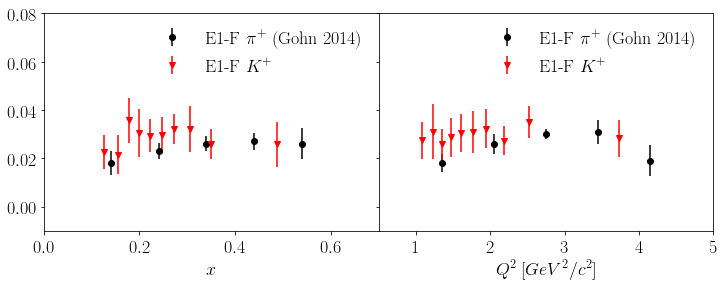

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), sharey=True)
fig.subplots_adjust(wspace=0)
plot_compare(pion_df, kaon_df, 'x', axs[0])
plot_compare(pion_df, kaon_df, 'q2', axs[1])

fig.savefig('../image/compare-pion-xq2.pdf', bbox_inches='tight')

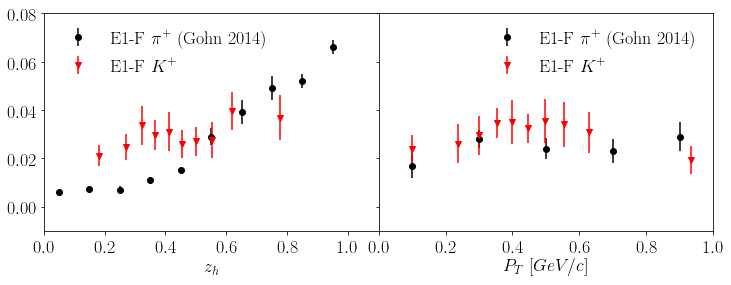

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12,4), sharey=True)
fig.subplots_adjust(wspace=0)
plot_compare(pion_df, kaon_df, 'z', axs[0])
plot_compare(pion_df, kaon_df, 'pt', axs[1])

fig.savefig('../image/compare-pion-zpt.pdf', bbox_inches='tight')

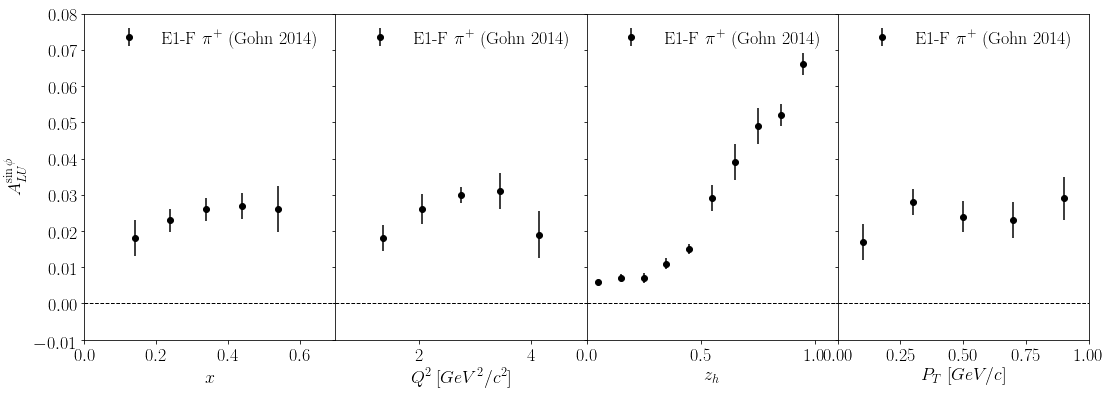

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(18,6), sharey=True)
fig.subplots_adjust(wspace=0)

plot_pions(pion_df, 'x', axs[0])
plot_pions(pion_df, 'q2', axs[1])
plot_pions(pion_df, 'z', axs[2])
plot_pions(pion_df, 'pt', axs[3])

axs[0].set_ylabel('$A_{LU}^{\sin\phi}$')

fig.savefig('../image/compare-pion-zpt.pdf', bbox_inches='tight')